<H3>Inferences for logistic regression</H3>

A quick recap: Logistic regression is about predicting the response of a binary categorical variable $y$ by fitting a linear model to the log of its odds ratio <P>&nbsp;</P>
$$
  \ln\left(\frac{\hat{y}}{1-\hat{y}} \right) = b_0 + b_1 x_1 + b_2 x_2~~ \mbox{ etc.}
$$

<H4>Inference types we will learn:</H4>

<UL>
    <LI>Significance test for the null hypothesis that all slopes are 0.</LI>
    <LI>Significance test for the null hypothesis that a specific/ 
        individual slope is 0.</LI>
    <LI>Confidence intervals for individual slope estimates.</LI>
    <LI>Confidence intervals for the odds ratio, and its interpretation 
        for each explanatory variable.</LI>
</UL>

The general strategy and interpretations are very similar to other 
inference strategies we've already seen. However, we use $z$-scores 
and $z$ procedures instead of $t$ procedures. Interpretation of 
confidence intervals requires a bit more care in order to get it right.

<P></P>
<H4>Confidence interval calculation:</H4>

Look up the $z^*$ value for the required confidence level. 
Then proceed with the needed calculation. 
<P></P>
<B>Confidence interval for true slope $\beta_1$:</B> 
$$b_1 \pm z^* SE_{b_1}$$

<B>Confidence interval for the odds ratio of $\beta_1$:</B>
$$(e^{b_1 - z^* SE_{b_1}}, e^{b_1 + z^* SE_{b_1}})$$

<B>Hypothesis test for $H_0: \beta_1=0$:</B>
<P></P>Compute the test statistic
$$ z=\frac{b_1 - 0}{SE_{b_1}}$$
and look up $P$-value.

<P>&nbsp;</P> 
<B>Some examples and exercises follow.</B>

In [25]:
# We revisit data from a previous class: The HSB data on the 
# High School and Beyond survey conducted by the National Center 
# for Educational Statistics. 
# Regression to predict "gender" from other variables.
#
lrdat = read.csv(file="https://www.openintro.org/data/csv/hsb2.csv", header=TRUE, sep=",")
head(lrdat)
gmod = glm (gender ~ read+write, data=lrdat, family=binomial)
summary(gmod)
#boxplot(lrdat$read ~ lrdat$gender

id  gender race  ses    schtyp prog       read write math science socst
1  70 male   white low    public general    57   52    41   47      57   
2 121 female white middle public vocational 68   59    53   63      61   
3  86 male   white high   public general    44   33    54   58      31   
4 141 male   white high   public vocational 63   44    47   53      56   
5 172 male   white middle public academic   47   52    57   53      61   
6 113 male   white middle public academic   44   52    51   63      61


Call:
glm(formula = gender ~ read + write, family = binomial, data = lrdat)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7971  -1.0104  -0.6612   1.0731   1.8672  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.70614    0.92342   1.848 0.064656 .  
read         0.07101    0.01960   3.623 0.000291 ***
write       -0.10637    0.02214  -4.804 1.56e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 275.64  on 199  degrees of freedom
Residual deviance: 247.82  on 197  degrees of freedom
AIC: 253.82

Number of Fisher Scoring iterations: 4


<H3>Exercises:</H3>

<OL>
    <LI>Carry out a significance test for the null hypothesis 
        that all slopes are 0.</LI>
    <LI>Significance test for each slope is 0.</LI>
    <LI>Confidence intervals for each slope estimate.</LI>
    <LI>Confidence intervals for the odds ratio, and its interpretation 
        for each slope.</LI>
</OL>

In [36]:
# There are two slightly different, generally accepted, methods 
# for computing logistic regression confidence intervals. 
# The confint.default() function computes the standard CI.
# The confint() function computes a special CI called 
# profile-likelihood based method (that's the reason for the 
# "waiting for profiling to be done..." comment seen in output). 
# They both give very similar answers.
#
cbind(OR = coef(gmod), confint.default(gmod))  
cbind(OR = coef(gmod), confint(gmod))

OR          2.5 %       97.5 %     
(Intercept)  1.70614330 -0.10372917  3.51601576
read         0.07101402  0.03259565  0.10943238
write       -0.10636747 -0.14976718 -0.06296775

Waiting for profiling to be done...



OR          2.5 %       97.5 %     
(Intercept)  1.70614330 -0.08283484  3.55145752
read         0.07101402  0.03366076  0.11080380
write       -0.10636747 -0.15168955 -0.06455949

In [37]:
exp(confint.default(gmod))

2.5 %     97.5 %    
(Intercept) 0.9014694 33.6500911
read        1.0331327  1.1156446
write       0.8609084  0.9389738

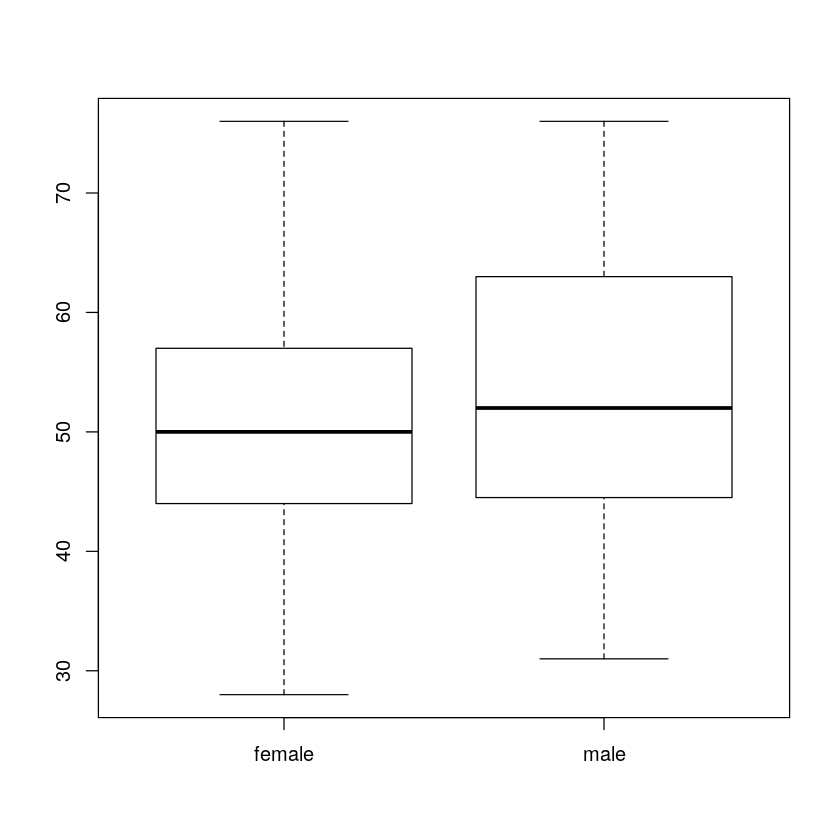

In [41]:
boxplot(lrdat$read ~ lrdat$gender)